## Continued Modeling

In [1]:
import pandas as pd

In [9]:
import seaborn as sns

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv('Data_and_Cleaning/modeling_df.csv')

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.0


In [5]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [6]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.0


In [7]:
df.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
SeriousDlqin2yrs,1.000000,-0.002280,-0.098903,0.246616,-0.002853,-0.028298,-0.014848,0.239613,0.004173,0.176011,0.047039,0.270354,-0.002727,0.034360,0.026668,0.017562,-0.034945
RevolvingUtilizationOfUnsecuredLines,-0.002280,1.000000,-0.005641,-0.002366,-0.000254,0.011870,-0.011352,-0.001416,0.005750,-0.001975,0.002346,-0.002350,0.982893,0.014118,0.005347,0.005790,0.013079
age,-0.098903,-0.005641,1.000000,-0.056166,-0.001665,0.058694,0.179676,-0.056932,0.059725,-0.043646,-0.209060,-0.063600,-0.000973,-0.036258,0.011429,0.054905,0.124074
NumberOfTime30-59DaysPastDueNotWorse,0.246616,-0.002366,-0.056166,1.000000,0.000485,-0.002900,0.055672,0.464783,0.028742,0.543580,0.052665,0.850145,-0.002447,0.023100,0.039690,0.027650,-0.014252
DebtRatio,-0.002853,-0.000254,-0.001665,0.000485,1.000000,-0.047227,0.007809,-0.002699,0.019120,0.002355,0.009798,-0.000029,-0.000520,0.053403,-0.008102,0.000266,-0.042486
MonthlyIncome,-0.028298,0.011870,0.058694,-0.002900,-0.047227,1.000000,0.143516,-0.023160,0.199752,-0.012461,0.097594,-0.014192,0.012824,0.109851,0.155034,0.118331,0.847973
NumberOfOpenCreditLinesAndLoans,-0.014848,-0.011352,0.179676,0.055672,0.007809,0.143516,1.000000,-0.068551,0.419023,-0.021596,0.037913,-0.004943,-0.010841,-0.035534,0.229394,0.209586,0.120342
NumberOfTimes90DaysLate,0.239613,-0.001416,-0.056932,0.464783,-0.002699,-0.023160,-0.068551,1.000000,-0.044744,0.639877,0.027654,0.815331,-0.001494,0.017059,-0.010954,-0.011530,-0.025767
NumberRealEstateLoansOrLines,0.004173,0.005750,0.059725,0.028742,0.019120,0.199752,0.419023,-0.044744,1.000000,-0.016808,0.119414,-0.007896,0.005689,0.232005,0.359348,0.317897,0.143684
NumberOfTime60-89DaysPastDueNotWorse,0.176011,-0.001975,-0.043646,0.543580,0.002355,-0.012461,-0.021596,0.639877,-0.016808,1.000000,0.025338,0.833094,-0.002057,0.012414,0.006237,0.002747,-0.016819


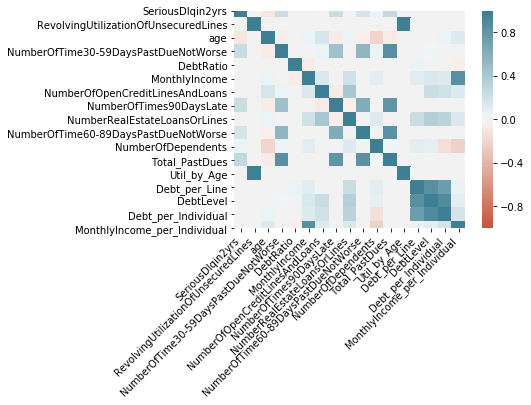

In [10]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df.SeriousDlqin2yrs

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## PCA

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)

xScaled = sScaler.fit_transform(X_train)

forPca = pd.DataFrame(xScaled)

from sklearn.decomposition import PCA

pcaMod = PCA(n_components=2)

xPca = pcaMod.fit_transform(X)

xPcaDataframe = pd.DataFrame(xPca, columns=['PC1', 'PC2'])

xPcaDataframe['cat'] = y

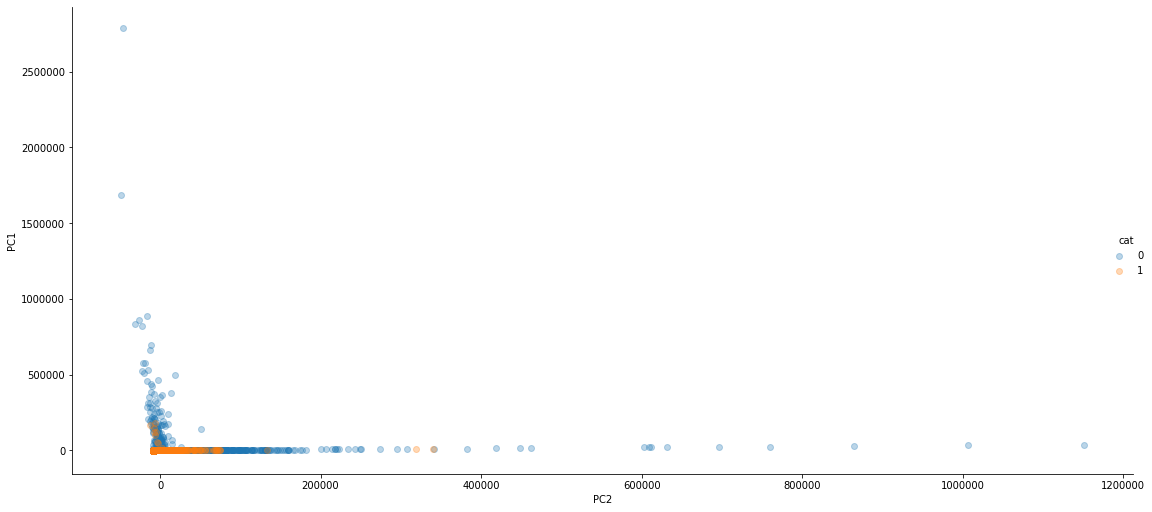

In [23]:
ax = sns.lmplot(data = xPcaDataframe, x='PC2', y='PC1', hue='cat', height=10, aspect=20, fit_reg=False,
               scatter_kws={'alpha': 0.3})
fig = plt.gcf()
fig.set_size_inches(15, 7)

## LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import minmax_scale

In [25]:
xScaled = minmax_scale(X, feature_range=(0, 1))

In [26]:
ldaMod = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', priors=None, n_components=2,
                                    store_covariance=False, tol=0.0001)

In [37]:
fittedLdaMod = ldaMod.fit(xScaled, y).transform(xScaled)

ldaDf = pd.DataFrame(fittedLdaMod, columns=['one', 'two'])

ldaDf['cat'] = y

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


ValueError: Shape of passed values is (119109, 1), indices imply (119109, 2)